In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale



In [ ]:
## Principal Component Analysis
athletics=pd.read_csv("/content/Athleticsdata.csv")

In [ ]:
athletics.head()

,Country,100m_s,200m_s,400m_s,800m_min,1500m_min,5000m_min,10000m_min,Marathon_min
0,Argentina,10.39,20.81,46.84,1.81,3.70,14.04,29.36,137.72
1,Australia,10.31,20.06,44.84,1.74,3.57,13.28,27.66,128.30
2,Austria,10.44,20.81,46.82,1.79,3.60,13.26,27.72,135.90
3,Belgium,10.34,20.68,45.04,1.73,3.60,13.22,27.45,129.95
4,Bermuda,10.28,20.58,45.91,1.80,3.75,14.68,30.55,146.62


In [ ]:
athletics.shape

(55, 9)

In [ ]:
athletics2=athletics.drop(['Country'], axis=1)

In [ ]:
athletics2.head()

,100m_s,200m_s,400m_s,800m_min,1500m_min,5000m_min,10000m_min,Marathon_min
0,10.39,20.81,46.84,1.81,3.70,14.04,29.36,137.72
1,10.31,20.06,44.84,1.74,3.57,13.28,27.66,128.30
2,10.44,20.81,46.82,1.79,3.60,13.26,27.72,135.90
3,10.34,20.68,45.04,1.73,3.60,13.22,27.45,129.95
4,10.28,20.58,45.91,1.80,3.75,14.68,30.55,146.62


In [ ]:
standardisedX = scale(athletics2)
X = pd.DataFrame(standardisedX, index=athletics2.index, columns=athletics2.columns)

In [ ]:
X.head()

,100m_s,200m_s,400m_s,800m_min,1500m_min,5000m_min,10000m_min,Marathon_min
0,-0.227911,-0.204089,0.277945,0.265078,0.011769,0.244610,0.207070,0.119876
1,-0.457388,-1.378238,-1.107373,-0.844216,-0.829733,-0.712758,-0.742002,-0.910447
2,-0.084489,-0.204089,0.264092,-0.051863,-0.635540,-0.737951,-0.708506,-0.079188
3,-0.371334,-0.407608,-0.968841,-1.002686,-0.635540,-0.788339,-0.859241,-0.729976
4,-0.543441,-0.564161,-0.366228,0.106607,0.335424,1.050814,0.871421,1.093323


In [ ]:
pca = PCA().fit(X)
names = ["PC"+str(i) for i in range(1,9)]

SD = list(np.std(pca.transform(X), axis=0))


In [ ]:
VarProp = list(pca.explained_variance_ratio_)

In [ ]:
CumProp = [np.sum(VarProp[:i]) for i in range(1,9)]

In [ ]:
summary = pd.DataFrame(list(zip(SD, VarProp, CumProp)), index=names, columns=['Standard Deviation','Proportion of Variance','Cumulative Proportion'])
summary


,Standard Deviation,Proportion of Variance,Cumulative Proportion
PC1,2.574068,0.828228,0.828228
PC2,0.935501,0.109395,0.937624
PC3,0.398207,0.019821,0.957445
PC4,0.352195,0.015505,0.972950
PC5,0.282863,0.010001,0.982951
PC6,0.260302,0.008470,0.991421
PC7,0.214848,0.005770,0.997191
PC8,0.149910,0.002809,1.000000


In [ ]:
rows = X.columns
col = ["Comp"+str(i) for i in range(1, len(X.columns)+1)]
L = pd.DataFrame(list(zip(pca.components_[0],pca.components_[1], pca.components_[2],pca.components_[3],pca.components_[4], pca.components_[5],pca.components_[6],pca.components_[7])),index=rows, columns = col)
L


,Comp1,Comp2,Comp3,Comp4,Comp5,Comp6,Comp7,Comp8
100m_s,0.318293,-0.564684,0.326323,-0.128698,-0.267423,0.590449,-0.154303,0.113210
200m_s,0.336855,-0.462270,0.369020,0.256689,0.157078,-0.647587,0.128066,-0.101621
400m_s,0.355561,-0.249318,-0.561085,-0.649891,0.221457,-0.158447,0.009292,-0.002585
800m_min,0.368626,-0.013405,-0.530948,0.481745,-0.540354,0.011856,0.237073,-0.040305
1500m_min,0.372682,0.140200,-0.154640,0.406710,0.490808,0.143104,-0.608456,0.143305
5000m_min,0.364283,0.312458,0.189618,-0.030521,0.250168,0.155079,0.592691,0.543015
10000m_min,0.366702,0.307018,0.181817,-0.081362,0.128320,0.231701,0.165205,-0.796334
Marathon_min,0.341825,0.439947,0.260172,-0.300243,-0.492792,-0.329455,-0.393327,0.160236


In [ ]:
Score= PCA().fit_transform(X)
Score_df = pd.DataFrame(Score, index = athletics.index, columns = col)
athletics = athletics.assign(performance=Score_df.Comp1)
athletics.head()

,Country,100m_s,200m_s,400m_s,800m_min,1500m_min,5000m_min,10000m_min,Marathon_min,performance
0,Argentina,10.39,20.81,46.84,1.81,3.70,14.04,29.36,137.72,0.265654
1,Australia,10.31,20.06,44.84,1.74,3.57,13.28,27.66,128.30,-2.466968
2,Austria,10.44,20.81,46.82,1.79,3.60,13.26,27.72,135.90,-0.813415
3,Belgium,10.34,20.68,45.04,1.73,3.60,13.22,27.45,129.95,-2.058239
4,Bermuda,10.28,20.58,45.91,1.80,3.75,14.68,30.55,146.62,0.747146


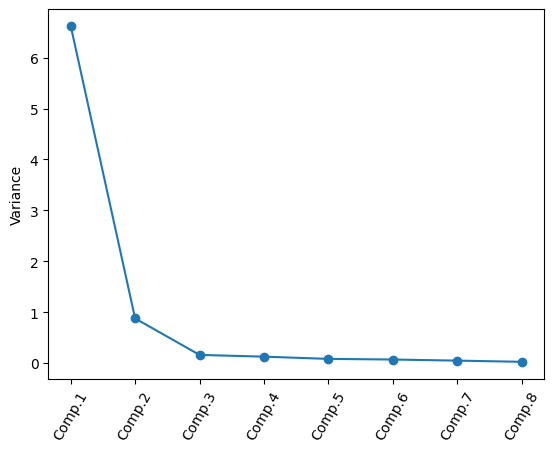

In [ ]:
import matplotlib.pyplot as plt
y = np.std(pca.transform(X), axis=0)**2
x = np.arange(len(y)) + 1
plt.plot(x, y, "o-")
plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
plt.ylabel("Variance")
plt.show()

In [ ]:
athletics.sort_values(by = 'performance').head(3)
athletics.sort_values(by = 'performance').tail(3)
## lower the score better is the performance, highher the score, poor performance
## performance of Cook islands, western Samoa, Mauritius performed poorly


,Country,100m_s,200m_s,400m_s,800m_min,1500m_min,5000m_min,10000m_min,Marathon_min,performance
35,Mauritius,11.19,22.45,47.70,1.88,3.83,15.06,31.77,152.23,4.299192
54,Western Samoa,10.82,21.86,49.00,2.02,4.24,16.28,34.71,161.83,7.297965
11,Cook Isands,12.18,23.20,52.94,2.02,4.24,16.70,35.38,164.70,10.653867


In [ ]:
athletics.sort_values(by = 'performance').head(3)

,Country,100m_s,200m_s,400m_s,800m_min,1500m_min,5000m_min,10000m_min,Marathon_min,performance
52,USA,9.93,19.75,43.86,1.73,3.53,13.20,27.43,128.22,-3.460450
20,Great Britain and Northern Ireland,10.11,20.21,44.93,1.70,3.51,13.01,27.51,129.13,-3.050287
28,Italy,10.01,19.72,45.26,1.73,3.60,13.23,27.52,131.08,-2.750446


In [ ]:
print(Score_df.corr().round())

       Comp1  Comp2  Comp3  Comp4  Comp5  Comp6  Comp7  Comp8
Comp1    1.0    0.0   -0.0    0.0   -0.0    0.0   -0.0    0.0
Comp2    0.0    1.0   -0.0    0.0    0.0    0.0    0.0    0.0
Comp3   -0.0   -0.0    1.0   -0.0    0.0    0.0    0.0    0.0
Comp4    0.0    0.0   -0.0    1.0   -0.0    0.0    0.0    0.0
Comp5   -0.0    0.0    0.0   -0.0    1.0   -0.0    0.0   -0.0
Comp6    0.0    0.0    0.0    0.0   -0.0    1.0   -0.0   -0.0
Comp7   -0.0    0.0    0.0    0.0    0.0   -0.0    1.0   -0.0
Comp8    0.0    0.0    0.0    0.0   -0.0   -0.0   -0.0    1.0


In [ ]:
## Principal Component Regression
import pandas as pd
salesdata = pd.read_csv('/content/pcrdata.csv')

In [ ]:
salesdata.head()

,SRNO,SALES,AD,PRO,SALEXP,ADPRE,PROPRE
0,1,20.11,1.98,0.9,0.31,2.02,0.0
1,2,15.10,1.94,0.0,0.30,1.99,1.0
2,3,18.68,2.20,0.8,0.35,1.93,0.0
3,4,16.05,2.00,0.0,0.35,2.20,0.8
4,5,21.30,1.69,1.3,0.30,2.00,0.0


In [ ]:
import statsmodels.formula.api as smf
predsales=smf.ols('SALES~AD+PRO+SALEXP+ADPRE+PROPRE', data=salesdata).fit()
predsales.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  SALES   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     273.2
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           2.09e-69
Time:                        15:24:31   Log-Likelihood:                -226.08
No. Observations:                 143   AIC:                             464.2
Df Residuals:                     137   BIC:                             481.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.8147      6.531     -1.656      0.100     -23.730       2.101
AD             4.6762      1.410      3.316      0.001       1.888       7.464
PRO            7.7886      1.263      6.168      0.000       5.292      10.286
SALEXP        22.4089      0.770     29.089      0.000      20.886      23.932
ADPRE          3.1856      1.244      2.560      0.012       0.725       5.646
PROPRE         3.4970      1.370      2.553      0.012       0.789       6.205
==============================================================================
Omnibus:                        8.788   Durbin-Watson:                   2.153
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                4.669
Skew:                           0.233   Prob(JB):                       0.0969
Kurtosis:                       2.247   Cond. No.                         206.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
y, X = dmatrices('SALES~AD+PRO+SALEXP+ADPRE+PROPRE', data=salesdata, return_type="dataframe")
vif = pd.Series([variance_inflation_factor(X.values, i)for i in range(X.shape[1])],index=X.columns)
vif


Intercept    4226.760949
AD             36.159771
PRO            31.846727
SALEXP          1.076284
ADPRE          24.781948
PROPRE         42.346468
dtype: float64

In [ ]:
## vif values of AD,PRO,ADPRE and PROPRE are very high (>5), severe multicollinearity
## Principal component analysis will take care of the problem of severe multicollinearity

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

salesdata2=salesdata.drop(['SRNO','SALES'], axis=1)
standardisedX = scale(salesdata2)
X = pd.DataFrame(standardisedX, index=salesdata2.index, columns=salesdata2.columns)

pca = PCA().fit(X)

In [ ]:

import numpy as np
names = ["PC"+str(i) for i in range(1,6)]

SD = list(np.std(pca.transform(X), axis=0))
VarProp = list(pca.explained_variance_ratio_)
CumProp = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1,6)]
summary = pd.DataFrame(list(zip(SD, VarProp, CumProp)), index=names, columns=['Standard Deviation','Proportion of Variance','Cumulative Proportion'])
summary


,Standard Deviation,Proportion of Variance,Cumulative Proportion
PC1,1.301556,0.338810,0.338810
PC2,1.131848,0.256216,0.595026
PC3,1.070535,0.229209,0.824235
PC4,0.933433,0.174259,0.998494
PC5,0.086770,0.001506,1.000000


In [ ]:
pip install hoggorm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 kB 862.2 kB/s eta 0:00:00


In [ ]:
import hoggorm as ho
pcmodel = ho.pcr.nipalsPCR(standardisedX, y)
salesdata['pcrpred'] = pcmodel.Y_predCal()[3]

salesdata.head()

,SRNO,SALES,AD,PRO,SALEXP,ADPRE,PROPRE,pcrpred
0,1,20.11,1.98,0.9,0.31,2.02,0.0,21.290481
1,2,15.10,1.94,0.0,0.30,1.99,1.0,18.169735
2,3,18.68,2.20,0.8,0.35,1.93,0.0,21.271485
3,4,16.05,2.00,0.0,0.35,2.20,0.8,17.621109
4,5,21.30,1.69,1.3,0.30,2.00,0.0,22.979205


In [ ]:
## Compare linear regression and PCR
salesdata_test = pd.read_csv('/content/pcrdata_test.csv')

In [ ]:
salesdata_test.head()

,SRNO,SALES,AD,PRO,SALEXP,ADPRE,PROPRE
0,1,28.93,2.75,1.00,0.72,1.97,0.02
1,2,25.96,1.73,1.06,0.89,2.77,0.02
2,3,31.25,2.19,1.26,0.79,1.22,0.42
3,4,25.05,1.82,1.45,0.83,2.23,0.15
4,5,27.32,2.38,1.01,0.74,1.01,0.07


In [ ]:
salesdata_test.shape

(22, 7)

In [ ]:
salesdata_test2=salesdata_test.drop(['SRNO','SALES'], axis=1)
standardisedX2 = scale(salesdata_test2)
salesdata_test['pcrpredict'] =  pcmodel.Y_predict(standardisedX2, numComp=3)
salesdata_test['pcrres'] = salesdata_test['SALES'] - salesdata_test['pcrpredict']

import math
import statistics
RMSE_pcr = math.sqrt(statistics.mean(salesdata_test['pcrres'])**2)

In [ ]:
RMSE_pcr

0.7734615384615366

In [ ]:
salesdata_test['lmpred'] = predsales.predict(salesdata_test)
salesdata_test['lmres'] = salesdata_test['SALES'] - salesdata_test['lmpred']

RMSE_lm= math.sqrt(statistics.mean(salesdata_test['lmres'])**2)


7.949631207886288

In [ ]:
RMSE_lm

7.949631207886288

# K-Means Method

In [ ]:
import pandas as pd
custsales = pd.read_csv("/content/RETAILERS DATA.csv")


In [ ]:
custsales.head()

,Custid,nsv,n_brands,n_bills,growth,region
0,1001,2119456,7,14,-1.79,Mumbai
1,1002,1460163,12,42,-1.73,Mumbai
2,1003,147976,4,6,2.81,Mumbai
3,1004,1350474,13,30,-0.99,Delhi
4,1005,1414461,15,29,13.56,Delhi


In [ ]:
custsales_cl = custsales
custsales_cl = custsales_cl.drop(["Custid", "region"], axis = 1)

In [ ]:
custsales_cl.head()

,nsv,n_brands,n_bills,growth
0,2119456,7,14,-1.79
1,1460163,12,42,-1.73
2,147976,4,6,2.81
3,1350474,13,30,-0.99
4,1414461,15,29,13.56


In [ ]:
custsales_cl.shape

(1158, 4)

In [ ]:
import sklearn.preprocessing
custsales_cl2 = sklearn.preprocessing.scale(custsales_cl)
custsales_cl2
## Scale function standardizes all variables (subtract mean and divide by standard deviation)


array([[ 1.3415212 , -0.57045618, -0.27177323, -1.40755324],
       [ 0.57976648,  0.03183071,  1.2604777 , -1.39462362],
       [-0.93634948, -0.93182832, -0.70955921, -0.41628239],
       ...,
       [ 1.04097324,  0.03183071,  0.43962899, -1.08862262],
       [-0.76570907, -0.57045618, -0.76428245, -0.19647886],
       [ 1.55237455,  2.8023504 ,  2.13604966,  1.37016007]])

In [ ]:
from sklearn.cluster import KMeans
CL = KMeans(n_clusters=4)
CL.fit(custsales_cl2)

# Compute centroids
centroids = CL.cluster_centers_
centroids


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[-0.50167108,  0.09512837, -0.37738561,  0.05667815],
       [ 1.05787676,  1.50072565,  1.61864265,  1.61971398],
       [-0.83149199, -0.84081608, -0.72104433, -0.53176571],
       [ 1.18889027, -0.0262847 ,  0.30258086, -0.63241876]])

In [ ]:
segment = pd.DataFrame(CL.labels_)
custsales = custsales.assign(segment = segment)
custsales.head()

,Custid,nsv,n_brands,n_bills,growth,region,segment
0,1001,2119456,7,14,-1.79,Mumbai,3
1,1002,1460163,12,42,-1.73,Mumbai,3
2,1003,147976,4,6,2.81,Mumbai,2
3,1004,1350474,13,30,-0.99,Delhi,3
4,1005,1414461,15,29,13.56,Delhi,1


In [ ]:
nsv = custsales.groupby('segment')['nsv'].mean()
n_brands = custsales.groupby('segment')['n_brands'].mean()
n_bills = custsales.groupby('segment')['n_bills'].mean()
growth = custsales.groupby('segment')['growth'].mean()
pd.concat([nsv,n_brands,n_bills,growth],axis=1)

,nsv,n_brands,n_bills,growth
segment,,,,
0,5.241869e+05,12.525478,12.070064,5.004777
1,1.873964e+06,24.194313,48.545024,12.258057
2,2.387294e+05,4.755556,5.790123,2.274099
3,1.987355e+06,11.517544,24.495614,1.807018


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

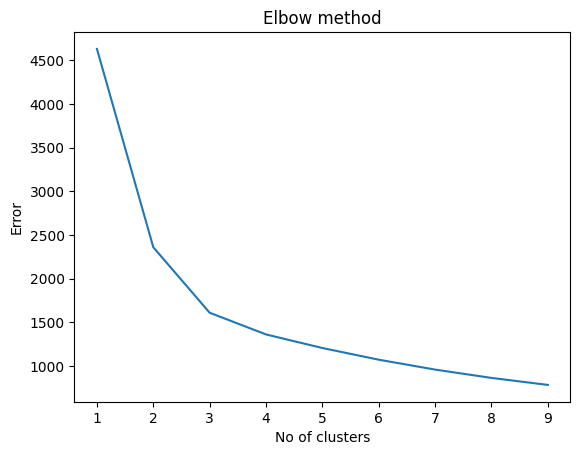

In [ ]:
Error =[]
import matplotlib.pyplot as plt

for i in range(1, 10):
    CL = KMeans(n_clusters = i).fit(custsales_cl2)
    Error.append(CL.inertia_)

plt.plot(range(1, 10), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()
